In [2]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Here are the equations for spin trajectory

#Mx' = -w*My+u(t)*Mz
#My' = w*Mx
#Mz' = -u(t)*Mx

#w=3

#M(0) = (0,0,1)

In [4]:
w = 3

In [5]:
T = np.linspace(0,np.pi,1000)

In [6]:
from scipy.integrate import solve_ivp

In [7]:
# defining a function which will return the all three equations
#where M = (Mx,My,Mz) which is same as M = [M[0], M[1], M[2]]
# Using u(t) = -cos(3t) 

def equations_for_spin(t, M): 
    return [-w*M[1]-np.cos(w*t)*M[2], w*M[0], np.cos(w*t)*M[0]]

In [8]:
# solve_ivp function takes first argument as equations , second as range of independent variable 
#which is time t in our case , third as initial condition

solution_for_spin = solve_ivp(equations_for_spin,(0,np.pi),[0,0,1], dense_output = True)

In [9]:
solution_on_T = solution_for_spin.sol(T)

In [10]:
Mx,My,Mz = solution_on_T[0],solution_on_T[1],solution_on_T[2]

In [11]:
#Now let's solve equations for Spring
#Here are the equations for spring

# x'(t) = -wy(t) -cos(3t)
# y'(t) = w*x(t)
#Here X = (x,y) same as X = [x[0],x[1]]

def equations_for_spring(t, X): 
    return [-w*X[1]-np.cos(3*t), w*X[0]]

solution_for_spring = solve_ivp(equations_for_spring,(0,np.pi),[0,0], dense_output = True)

In [12]:
solution_for_spring_on_T = solution_for_spring.sol(T)

In [13]:
X,Y = solution_for_spring_on_T[0],solution_for_spring_on_T[1]
Z = np.zeros(len(X))

/home/nusart/.local/lib/python3.8/site-packages/qutip/bloch.py:582: RuntimeWarning: divide by zero encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
/home/nusart/.local/lib/python3.8/site-packages/qutip/bloch.py:582: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):


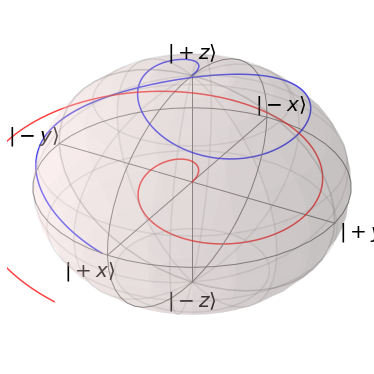

In [14]:


B = Bloch()

B.add_points([Mx,My,Mz], meth = 'l')   # adding points for spin trajectory

B.add_points([X,Y,Z],meth='l')

B.zlabel = ['$\\left|+z\\right>$','$\\left|-z\\right>$']
B.ylabel = ['$\\left|+y\\right>$','$\\left|-y\\right>$']
B.xlabel = ['$\\left|+x\\right>$','$\\left|-x\\right>$']

B.show()

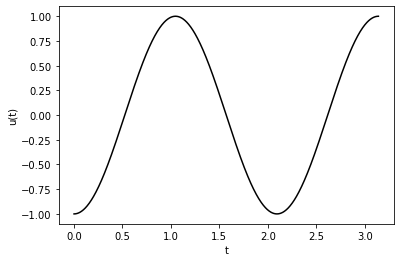

In [15]:
#Now plotting the control u(t)

plt.plot(T,-np.cos(3*T),color = 'black')
plt.xlabel('t')
plt.ylabel('u(t)')

plt.show()

In [16]:
import matplotlib as mpl
from pylab import *
from qutip import *
from matplotlib import cm
import imageio

def animate_bloch(states, duration=0.1, save_all=False):

    b = Bloch()
    b.vector_color = ['r']
    b.view = [-40,30]
    images=[]
    try:
        length = len(states)
    except:
        length = 1
        states = [states]
    ## normalize colors to the length of data ##
    nrm = mpl.colors.Normalize(0,length)
    colors = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

    ## customize sphere properties ##
    b.point_color = list(colors) # options: 'r', 'g', 'b' etc.
    b.point_marker = ['o']
    b.point_size = [30]
    
    for i in range(length):
        b.clear()
        b.add_states(states[i])
        b.add_states(states[:(i+1)],'point')
        if save_all:
            b.save(dirc='tmp') #saving images to tmp directory
            filename="tmp/bloch_%01d.png" % i
        else:
            filename='temp_file.png'
            b.save(filename)
        images.append(imageio.imread(filename))
    imageio.mimsave('bloch_anim.gif', images, duration=duration)

In [40]:
states = []
shape = len(X)
print(shape)

for i in range(shape):
    states.append(X[i]*basis(2) + Y[i]*basis(2) + Z[i]*basis(2))

animate_bloch(states, duration=0.1, save_all=False)

rt/.local/lib/python3.8/site-packages/qutip/bloch.py:582: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
/home/nusart/.local/lib/python3.8/site-packages/qutip/bloch.py:582: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
/home/nusart/.local/lib/python3.8/site-packages/qutip/bloch.py:582: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
/home/nusart/.local/lib/python3.8/site-packages/qutip/bloch.py:582: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
/home/nusart/.local/lib/python3.8/site-packages/qutip/bloch.py:582: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
/home/nusart/.local/lib/python3.8/site-packages/qutip/bloch.py:582: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(di